In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


<p style = "font-size : 50px; color : blue ; font-family : 'Comic Sans MS'; text-align : center; background-color : yellow; border-radius: 5px 5px;"><strong>Titanic EDA and Prediction</strong></p>

<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : lightgreen; border-radius: 5px 5px;"><strong>Importing all necessary libraries</strong></p> 

In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
from scipy import stats
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from mlxtend.regressor import StackingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
pd.pandas.set_option("display.max_columns",None)
print("all necessary libraries are imported")

all necessary libraries are imported


In [3]:
train=pd.read_csv("../input/titanic/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test=pd.read_csv("../input/titanic/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.shape,test.shape

((891, 12), (418, 11))

In [6]:
train_cat=list(train.select_dtypes(include='object'))
train_cat


['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [7]:
train_num=list(train.select_dtypes(exclude='object'))
train_num

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : lightblue; border-radius: 5px 5px;"><strong>Univariate Analysis</strong></p> 

<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : orange; border-radius: 5px 5px;"><strong>Target Feature</strong></p> 

<AxesSubplot:>

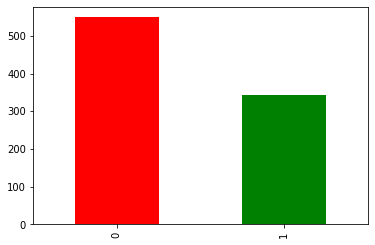

In [8]:
train['Survived'].value_counts().plot.bar(color=['r','g'])

it says that most of the people have dead

<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : orange; border-radius: 5px 5px;"><strong>Categorical Feature</strong></p> 

<AxesSubplot:>

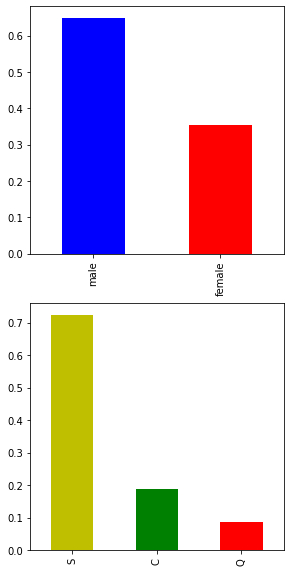

In [9]:
plt.figure(1)
plt.subplot(221)
train['Sex'].value_counts(normalize=True).plot.bar(figsize=(10,10),color=['b','r'])
plt.subplot(223)
train['Embarked'].value_counts(normalize=True).plot.bar(figsize=(10,10),color=['y','g','r'])

* > Around 80% of the passangers are male
* > Around 75% of passangers have embarked as S

<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : orange; border-radius: 5px 5px;"><strong>Numerical Feature</strong></p> 

<AxesSubplot:>

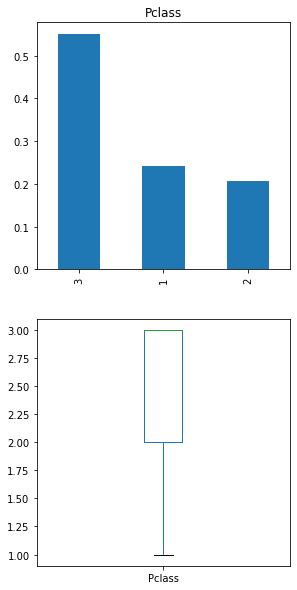

In [10]:
plt.figure(1)
plt.subplot(221)
train['Pclass'].value_counts(normalize=True).plot.bar(figsize=(10,10),title="Pclass")
plt.subplot(223)
train['Pclass'].plot.box(figsize=(10,10))

<AxesSubplot:>

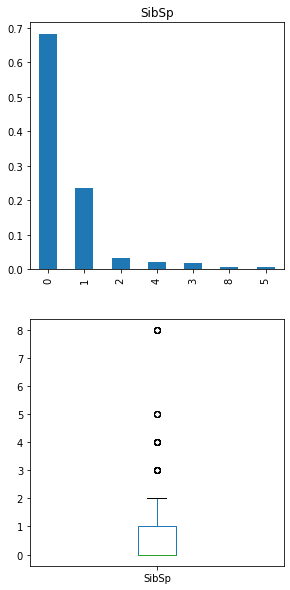

In [11]:
plt.figure(1)
plt.subplot(221)
train['SibSp'].value_counts(normalize=True).plot.bar(figsize=(10,10),title="SibSp")
plt.subplot(223)
train['SibSp'].plot.box(figsize=(10,10))

<AxesSubplot:>

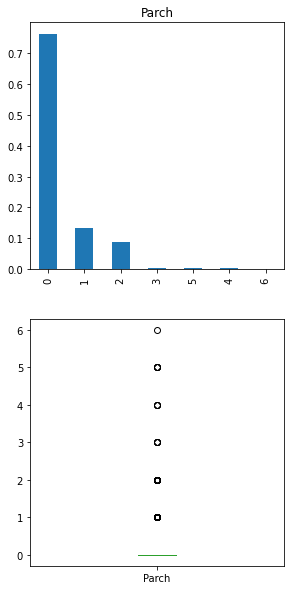

In [12]:
plt.figure(1)
plt.subplot(221)
train['Parch'].value_counts(normalize=True).plot.bar(figsize=(10,10),title="Parch")
plt.subplot(223)
train['Parch'].plot.box(figsize=(10,10))

<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : lightblue; border-radius: 5px 5px;"><strong>Bivariate Analysis</strong></p> 

<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : orange; border-radius: 5px 5px;"><strong>Categorical vs Target Feature</strong></p> 

In [13]:
train_cat

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

<AxesSubplot:xlabel='Sex'>

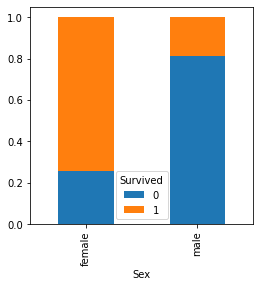

In [14]:
sex=pd.crosstab(train['Sex'],train['Survived'])
sex.div(sex.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

> More males have dead comapre to females
as if 1 shows alive and 0 shows death

<AxesSubplot:xlabel='Embarked'>

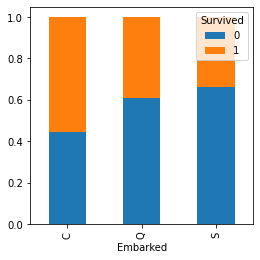

In [15]:
embarked=pd.crosstab(train['Embarked'],train['Survived'])
embarked.div(embarked.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

> The survival rate of embarked 'C' is greater than the rest two and the lowest survival rate is associated with embarked 'S'

<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : orange; border-radius: 5px 5px;"><strong>Numerical vs Target Feature</strong></p> 

In [16]:
train_num

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

<AxesSubplot:xlabel='Pclass'>

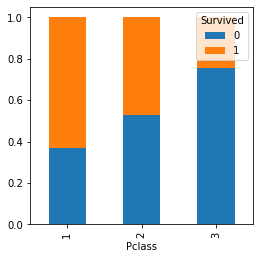

In [17]:
pclass=pd.crosstab(train['Pclass'],train['Survived'])
pclass.div(pclass.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

> class 1 has most survival rate and class 3 has least survival rate

<AxesSubplot:xlabel='SibSp'>

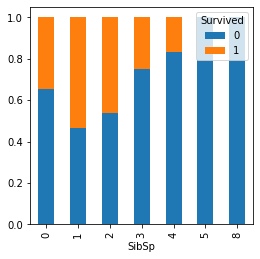

In [18]:
sibsp=pd.crosstab(train['SibSp'],train['Survived'])
sibsp.div(sibsp.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

<AxesSubplot:xlabel='Parch'>

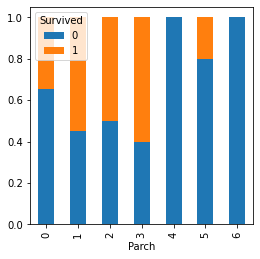

In [19]:
parch=pd.crosstab(train['Parch'],train['Survived'])
parch.div(parch.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

In [20]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [21]:
train_missing_obj_col=[]
for col in train_cat:
    if train[col].isnull().any():
        train_missing_obj_col.append(col)
train_missing_obj_col        

['Cabin', 'Embarked']

<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : lightblue; border-radius: 5px 5px;"><strong>Missing Values Imputation In Train Dataset</strong></p>

<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : orange; border-radius: 5px 5px;"><strong>Imputation In Numerical Col</strong></p> 

In [22]:
train_missing_num_col=[]
for col in train_num:
    if train[col].isnull().any():
        train_missing_num_col.append(col)
train_missing_num_col     

['Age']

In [23]:
temp=train[['Age']]
temp

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [24]:
train.drop(['Age'],inplace=True,axis=1)

In [25]:
from sklearn.impute import SimpleImputer
my_imputer=SimpleImputer()
imputed_temp = pd.DataFrame(my_imputer.fit_transform(temp))
imputed_temp.columns = temp.columns

In [26]:
train=pd.concat([train,imputed_temp],axis=1)

In [27]:
train

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,22.000000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,38.000000
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,26.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,35.000000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,NaN,S,27.000000
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,B42,S,19.000000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,NaN,S,29.699118
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C148,C,26.000000


<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : orange; border-radius: 5px 5px;"><strong>Imputation In Categorical Col</strong></p>

In [28]:
train['Embarked'].fillna(train['Embarked'].mode(),inplace=True)

In [29]:
dummy1=pd.get_dummies(train[['Sex','Embarked']])
dummy1

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
886,0,1,0,0,1
887,1,0,0,0,1
888,1,0,0,0,1
889,0,1,1,0,0


In [30]:
train.drop(train_missing_obj_col ,axis=1,inplace=True)

In [31]:
train=pd.concat([train,dummy1],axis=1)

In [32]:
train.drop(['Name','PassengerId','Sex','Ticket'],axis=1,inplace=True)

In [33]:
train

,Survived,Pclass,SibSp,Parch,Fare,Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,0,7.2500,22.000000,0,1,0,0,1
1,1,1,1,0,71.2833,38.000000,1,0,1,0,0
2,1,3,0,0,7.9250,26.000000,1,0,0,0,1
3,1,1,1,0,53.1000,35.000000,1,0,0,0,1
4,0,3,0,0,8.0500,35.000000,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,27.000000,0,1,0,0,1
887,1,1,0,0,30.0000,19.000000,1,0,0,0,1
888,0,3,1,2,23.4500,29.699118,1,0,0,0,1
889,1,1,0,0,30.0000,26.000000,0,1,1,0,0


In [34]:
train.shape

(891, 11)

<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : lightblue; border-radius: 5px 5px;"><strong>Removing the Skewness In the Train Data Col</strong></p>

In [35]:
train['Age']=np.log(train['Age']+1)

In [36]:
train['Fare']=np.log(train['Fare']+1)

<AxesSubplot:title={'center':'Log Age distribution'}, ylabel='Density'>

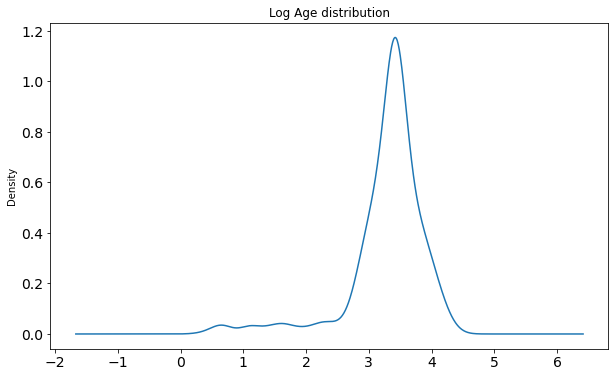

In [37]:
 (train['Age']).plot(kind = 'density', title = 'Log Age distribution', fontsize=14, figsize=(10, 6))

<AxesSubplot:title={'center':'Survived'}, ylabel='Density'>

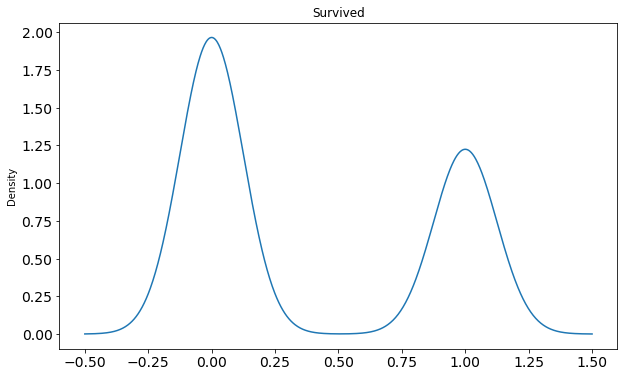

In [38]:
 (train['Survived']).plot(kind = 'density', title = 'Survived', fontsize=14, figsize=(10, 6))

<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : lightblue; border-radius: 5px 5px;"><strong>Feature Engineering on Test Dataset</strong></p>

In [39]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [40]:
test_cat_col=list(test.select_dtypes(include='object'))
test_cat_col

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [41]:
test_num_col=list(test.select_dtypes(exclude='object'))
test_num_col

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [42]:
test_missing_cat_col=[col for col in test_cat_col if test[col].isnull().any()]
test_missing_cat_col

['Cabin']

In [43]:
test_missing_num_col=[col for col in test_num_col if test[col].isnull().any()]
test_missing_num_col

['Age', 'Fare']

<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : lightblue; border-radius: 5px 5px;"><strong>Missing Values Imputation In Test Dataset</strong></p>

<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : orange; border-radius: 5px 5px;"><strong>Imputation In Numerical Col</strong></p>

In [44]:
temp1=test[['Age','Fare']]

In [45]:
imputer=SimpleImputer()
imputed_temp1=pd.DataFrame(imputer.fit_transform(temp1))
imputed_temp1.columns=temp1.columns

In [46]:
test.drop(['Age','Cabin','Name','Fare'],axis=1,inplace=True)

In [47]:
test=pd.concat([test,imputed_temp1],axis=1)
test

,PassengerId,Pclass,Sex,SibSp,Parch,Ticket,Embarked,Age,Fare
0,892,3,male,0,0,330911,Q,34.50000,7.8292
1,893,3,female,1,0,363272,S,47.00000,7.0000
2,894,2,male,0,0,240276,Q,62.00000,9.6875
3,895,3,male,0,0,315154,S,27.00000,8.6625
4,896,3,female,1,1,3101298,S,22.00000,12.2875
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,0,0,A.5. 3236,S,30.27259,8.0500
414,1306,1,female,0,0,PC 17758,C,39.00000,108.9000
415,1307,3,male,0,0,SOTON/O.Q. 3101262,S,38.50000,7.2500
416,1308,3,male,0,0,359309,S,30.27259,8.0500


<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : orange; border-radius: 5px 5px;"><strong>Imputation In Categorical Col</strong></p>

In [48]:
dummy2=pd.get_dummies(test[['Sex','Embarked']])
dummy2

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,1,0
1,1,0,0,0,1
2,0,1,0,1,0
3,0,1,0,0,1
4,1,0,0,0,1
...,...,...,...,...,...
413,0,1,0,0,1
414,1,0,1,0,0
415,0,1,0,0,1
416,0,1,0,0,1


In [49]:
test.drop(['PassengerId','Sex','Embarked','Ticket'],axis=1,inplace=True)

In [50]:
test=pd.concat([test,dummy2],axis=1)
test

,Pclass,SibSp,Parch,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0,0,34.50000,7.8292,0,1,0,1,0
1,3,1,0,47.00000,7.0000,1,0,0,0,1
2,2,0,0,62.00000,9.6875,0,1,0,1,0
3,3,0,0,27.00000,8.6625,0,1,0,0,1
4,3,1,1,22.00000,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,0,0,30.27259,8.0500,0,1,0,0,1
414,1,0,0,39.00000,108.9000,1,0,1,0,0
415,3,0,0,38.50000,7.2500,0,1,0,0,1
416,3,0,0,30.27259,8.0500,0,1,0,0,1


In [51]:
test.shape

(418, 10)

<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : lightblue; border-radius: 5px 5px;"><strong>Removing the Skewness In the Test Data Col</strong></p>

In [52]:
test['Age']=np.log(test['Age'])

In [53]:
test['Fare']=np.log(test['Fare']+1)

<AxesSubplot:title={'center':'Log Age distribution'}, ylabel='Density'>

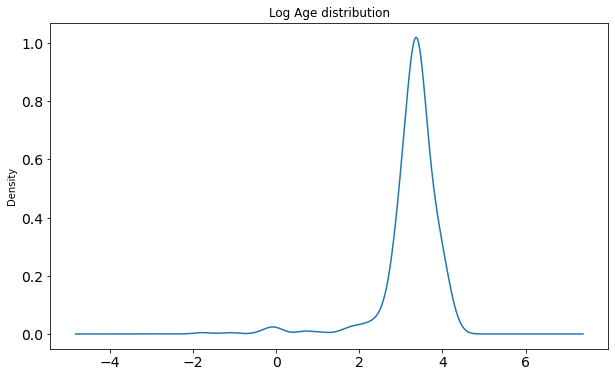

In [54]:
 (test['Age']).plot(kind = 'density', title = 'Log Age distribution', fontsize=14, figsize=(10, 6))

<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : orange; border-radius: 5px 5px;"><strong>Removing Target Variable from the Train Dataset</strong></p>

In [55]:
y=train['Survived']

In [56]:
train.drop(['Survived'],axis=1,inplace=True)

In [57]:
train.head()

,Pclass,SibSp,Parch,Fare,Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0,2.110213,3.135494,0,1,0,0,1
1,1,1,0,4.280593,3.663562,1,0,1,0,0
2,3,0,0,2.188856,3.295837,1,0,0,0,1
3,1,1,0,3.990834,3.583519,1,0,0,0,1
4,3,0,0,2.202765,3.583519,0,1,0,0,1


In [58]:
test.head()

,Pclass,SibSp,Parch,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0,0,3.540959,2.178064,0,1,0,1,0
1,3,1,0,3.850148,2.079442,1,0,0,0,1
2,2,0,0,4.127134,2.369075,0,1,0,1,0
3,3,0,0,3.295837,2.268252,0,1,0,0,1
4,3,1,1,3.091042,2.586824,1,0,0,0,1


In [59]:
train.shape,test.shape

((891, 10), (418, 10))

<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : lightblue; border-radius: 5px 5px;"><strong>Model Building</strong></p>

<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : lightgreen; border-radius: 5px 5px;"><strong>Logistic Regression</strong></p>

In [60]:
x_train,x_test,y_train,y_test=train_test_split(train,y,random_state=42)

In [61]:
logistic=LogisticRegression(max_iter=100,random_state=1,n_jobs=-1)
logistic.fit(x_train,y_train)
pred1=logistic.predict(x_test)
pred1

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0])

In [62]:
logistic.score(x_train,y_train)

0.812874251497006

<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : lightgreen; border-radius: 5px 5px;"><strong>Random Forest Classifier</strong></p>

# Hyperparameter tuning

In [63]:
# param_grid = { "criterion" : ["gini","entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], 
#               "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
# rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
# clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
# clf.fit(x_train, y_train)
# clf.best_params_

# Now buliding the model with best parameters

In [64]:
random_forest = RandomForestClassifier(criterion = "entropy", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 12,
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=42, 
                                       n_jobs=-1)

random_forest.fit(x_train, y_train)
pred2 = random_forest.predict(x_test)

random_forest.score(x_train, y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 82.34 %


<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : lightgreen; border-radius: 5px 5px;"><strong> Stochastic Gradient Descent (SGD)</strong></p>

In [65]:
sgd = SGDClassifier(random_state=42)
sgd.fit(x_train, y_train)
sgd_pred = sgd.predict(x_test)

sgd.score(x_train, y_train)

acc_sgd = round(sgd.score(x_train, y_train) * 100, 2)
acc_sgd

72.6

# Hyperparameter tuning

In [66]:

sgdc=SGDClassifier(random_state=0)

parameters = {
            'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
             'loss':['hinge','log'], 'penalty':['l1','l2']}
searcher = GridSearchCV(sgdc, parameters, cv=10)
searcher.fit(x_train, y_train)
print(searcher.best_params_)
print(searcher.best_score_)

{'alpha': 0.001, 'loss': 'hinge', 'penalty': 'l1'}
0.8040479421076437


# Now buliding the model with best parameters

In [67]:
sgd = SGDClassifier(random_state=0,alpha=0.001,loss='log',penalty='l1')
sgd.fit(x_train, y_train)
pred3 = sgd.predict(x_test)


<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : lightgreen; border-radius: 5px 5px;"><strong> K Nearest Neighbor (KNN)</strong></p>

In [68]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train, y) 
pred4 = knn.predict(test)  
acc_knn = round(knn.score(train, y) * 100, 2)

<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : lightgreen; border-radius: 5px 5px;"><strong>Linear Support Vector Machine</strong></p># Linear Support Vector Machine

In [69]:
linear_svc = LinearSVC(max_iter=100000,dual=True)
linear_svc.fit(x_train, y_train)

pred5 = linear_svc.predict(x_test)

acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100, 2)
acc_linear_svc 

81.44

<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : lightgreen; border-radius: 5px 5px;"><strong>Decision Tree</strong></p>

In [70]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, y)
d_pred = decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(train,y) * 100, 2)
acc_decision_tree

98.2

# **Hyperparameter tuning**

In [71]:
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

decision = GridSearchCV(decision_tree, grid_param, cv = 5, n_jobs = -1, verbose = 1)
decision.fit(x_train, y_train)
print(decision.best_params_)
print(decision.best_score_)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
{'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
0.826282123218494


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.75010661 ... 0.79190888 0.77546852 0.78296487]
  category=UserWarning


# Now buliding the model with best parameters

In [72]:
decision_tree = DecisionTreeClassifier(criterion='gini',
                                      max_depth=3,
                                      splitter='best',
                                      min_samples_leaf=3,
                                      min_samples_split=3,
                                      max_features='auto')
decision_tree.fit(x_train, y_train)
pred6 = decision_tree.predict(x_test)

<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : lightgreen; border-radius: 5px 5px;"><strong>Adaboost Classifier</strong></p># AdaboostClassifier

In [73]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(base_estimator = decision_tree)
adb.fit(x_train,y_train)
adb_pred=adb.predict(x_test)
adb.score(x_train,y_train)

0.9550898203592815

# Hyperparameter Tuning

In [74]:
grid_param = {
    'n_estimators' : [100, 120, 150, 180, 200],
    'learning_rate' : [0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

ada = GridSearchCV(adb, grid_param, cv = 5, n_jobs = -1, verbose = True)
ada.fit(x_train, y_train)
print(ada.best_params_)
print(ada.best_score_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [0.8053866  0.80391651 0.81289418 0.81438671 0.81436427 0.81135675
 0.8203232  0.82633823 0.81587925 0.81284929 0.81136797 0.81884188
 0.80989788 0.82186062 0.81142408        nan        nan        nan
        nan        nan 0.82037931 0.81289418 0.81439794 0.81738301
 0.8143306  0.8129054  0.79937156 0.8083829  0.79643138 0.80994277
 0.77250589 0.76503198 0.75898328 0.78149478 0.78148356 0.55221636
 0.43655033 0.38812703 0.53998429 0.29502862]
  category=UserWarning


{'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 150}
0.826338233643811


In [75]:
adb = AdaBoostClassifier(n_estimators=100,
                        learning_rate=0.01,
                        algorithm='SAMME')
adb.fit(x_train,y_train)
pred7=adb.predict(x_test)

<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : lightgreen; border-radius: 5px 5px;"><strong>Gradient Boosting</strong></p># GradientBoosting

In [76]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
pred8=gb.predict(x_test)
gb.score(x_train,y_train)

0.905688622754491

<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : lightgreen; border-radius: 5px 5px;"><strong>LightGBM</strong></p>

In [77]:
import lightgbm as lgb
lgbm= lgb.LGBMClassifier()
lgbm.fit(x_train,y_train)
lgbm.predict(x_test)
lgbm.score(x_train,y_train)

0.9535928143712575

# Hyperparameter Tuning

In [78]:
fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'auc', 
            "eval_set" : [(x_test,y_test)],
            'eval_names': ['valid'],
            'verbose': 100,
            'categorical_feature': 'auto'}

In [79]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(50, 100), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [80]:
from sklearn.model_selection import RandomizedSearchCV
clf = lgb.LGBMClassifier(max_depth=-1, random_state=42, silent=True, metric='None', n_jobs=4, n_estimators=100)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=100,
    scoring='roc_auc',
    cv=3,
    refit=True,
    random_state=314,
    verbose=True)

In [81]:
gs.fit(x_train, y_train, **fit_params)
print('Best score reached: {} with params: {} '.format(gs.best_score_, gs.best_params_))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[17]	valid's auc: 0.857748
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[47]	valid's auc: 0.856364
Training until validation scores don't improve for 30 rounds
[100]	valid's auc: 0.854687
Did not meet early stopping. Best iteration is:
[92]	valid's auc: 0.862485
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[53]	valid's auc: 0.850914
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[19]	valid's auc: 0.846638
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[19]	valid's auc: 0.834312
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't im

In [82]:
opt_params={'colsample_bytree': 0.6427690433739622, 'min_child_samples': 51, 
            'min_child_weight': 10.0, 'num_leaves': 14, 'reg_alpha': 0, 
            'reg_lambda': 5, 'subsample': 0.3489139928277285} 

In [83]:
clf_sw = lgb.LGBMClassifier(**clf.get_params())
#set optimal parameters
clf_sw.set_params(**opt_params)

LGBMClassifier(colsample_bytree=0.6427690433739622, metric='None',
               min_child_samples=51, min_child_weight=10.0, n_jobs=4,
               num_leaves=14, random_state=42, reg_alpha=0, reg_lambda=5,
               subsample=0.3489139928277285)

In [84]:
clf_sw.fit(x_train,y_train)
clf_sw.predict(x_test)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0])

<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : lightgreen; border-radius: 5px 5px;"><strong>Voting Classifier</strong></p>

In [85]:
from sklearn.ensemble import VotingClassifier 
classifiers = [('LGB', clf_sw),('Logistic Regression', logistic),('Gradient Boosting', gb),
               ('Adaboost', adb)]
vc = VotingClassifier(estimators=classifiers )     
vc.fit(x_train,y_train)   
voting_pred = vc.predict(x_test)
accuracy = accuracy_score(y_test,voting_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.812


<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : lightblue; border-radius: 5px 5px;"><strong>Important Features</strong></p># Looking for the feature importance

In [86]:
importances = pd.DataFrame({'feature':train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Fare,0.220
Age,0.206
Sex_male,0.183
Sex_female,0.148
Pclass,0.113
SibSp,0.050
Parch,0.036
Embarked_C,0.019
Embarked_S,0.015


<AxesSubplot:xlabel='feature'>

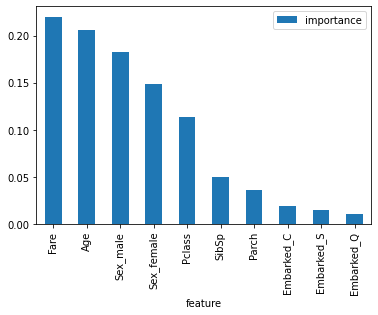

In [87]:
importances.plot.bar()

In [88]:
x_train.head()

,Pclass,SibSp,Parch,Fare,Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
298,1,0,0,3.449988,3.424234,0,1,0,0,1
884,3,0,0,2.085672,3.258097,0,1,0,0,1
247,2,0,2,2.740840,3.218876,1,0,0,0,1
478,3,0,0,2.142510,3.135494,0,1,0,0,1
305,1,1,2,5.027492,0.652325,0,1,0,0,1


<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : lightgreen; border-radius: 5px 5px;"><strong>Final Prediction</strong></p>

In [89]:
final_pred=vc.predict(test)

In [90]:
submission=pd.read_csv('../input/titanic/gender_submission.csv')

In [91]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [92]:
submission['Survived']=final_pred

In [93]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [94]:
pd.DataFrame(submission,columns=['PassengerId','Survived']).to_csv('titanic_new.csv',index=False)

In [95]:
pd.read_csv('titanic_new.csv')

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
